In [1]:
import pandas as pd   
import numpy as np    
import matplotlib.pyplot as plt 
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import auc, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.metrics import fbeta_score, cohen_kappa_score
SEED = 42
df=pd.read_csv('preprocessed_datset.csv')  

In [2]:
df.head()

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M,status
0,0,14,29.065927,88.0,174.0,57.5,39.0,95.5,106.5,20.0,1,0
1,0,8,26.989619,78.0,170.0,57.0,36.5,90.0,100.0,20.0,1,0
2,0,16,23.939481,75.0,177.0,59.0,39.0,88.0,104.0,20.0,1,0
3,0,15,22.129740,67.0,174.0,57.0,35.0,74.0,94.0,20.0,1,0
4,0,15,22.129740,67.0,174.0,57.0,35.0,74.0,94.0,20.0,1,0


In [3]:
print((df['status'].value_counts()/(df['status'].value_counts().sum()))*100)

0    55.376344
3    44.047619
1     0.326421
2     0.249616
Name: status, dtype: float64


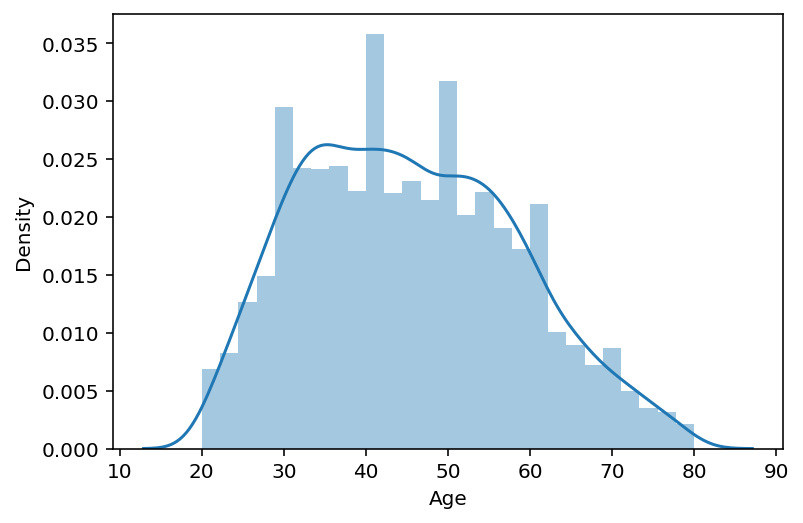

In [4]:
sns.distplot(df['Age'])
sns.set(rc={'figure.figsize':(10,10)})

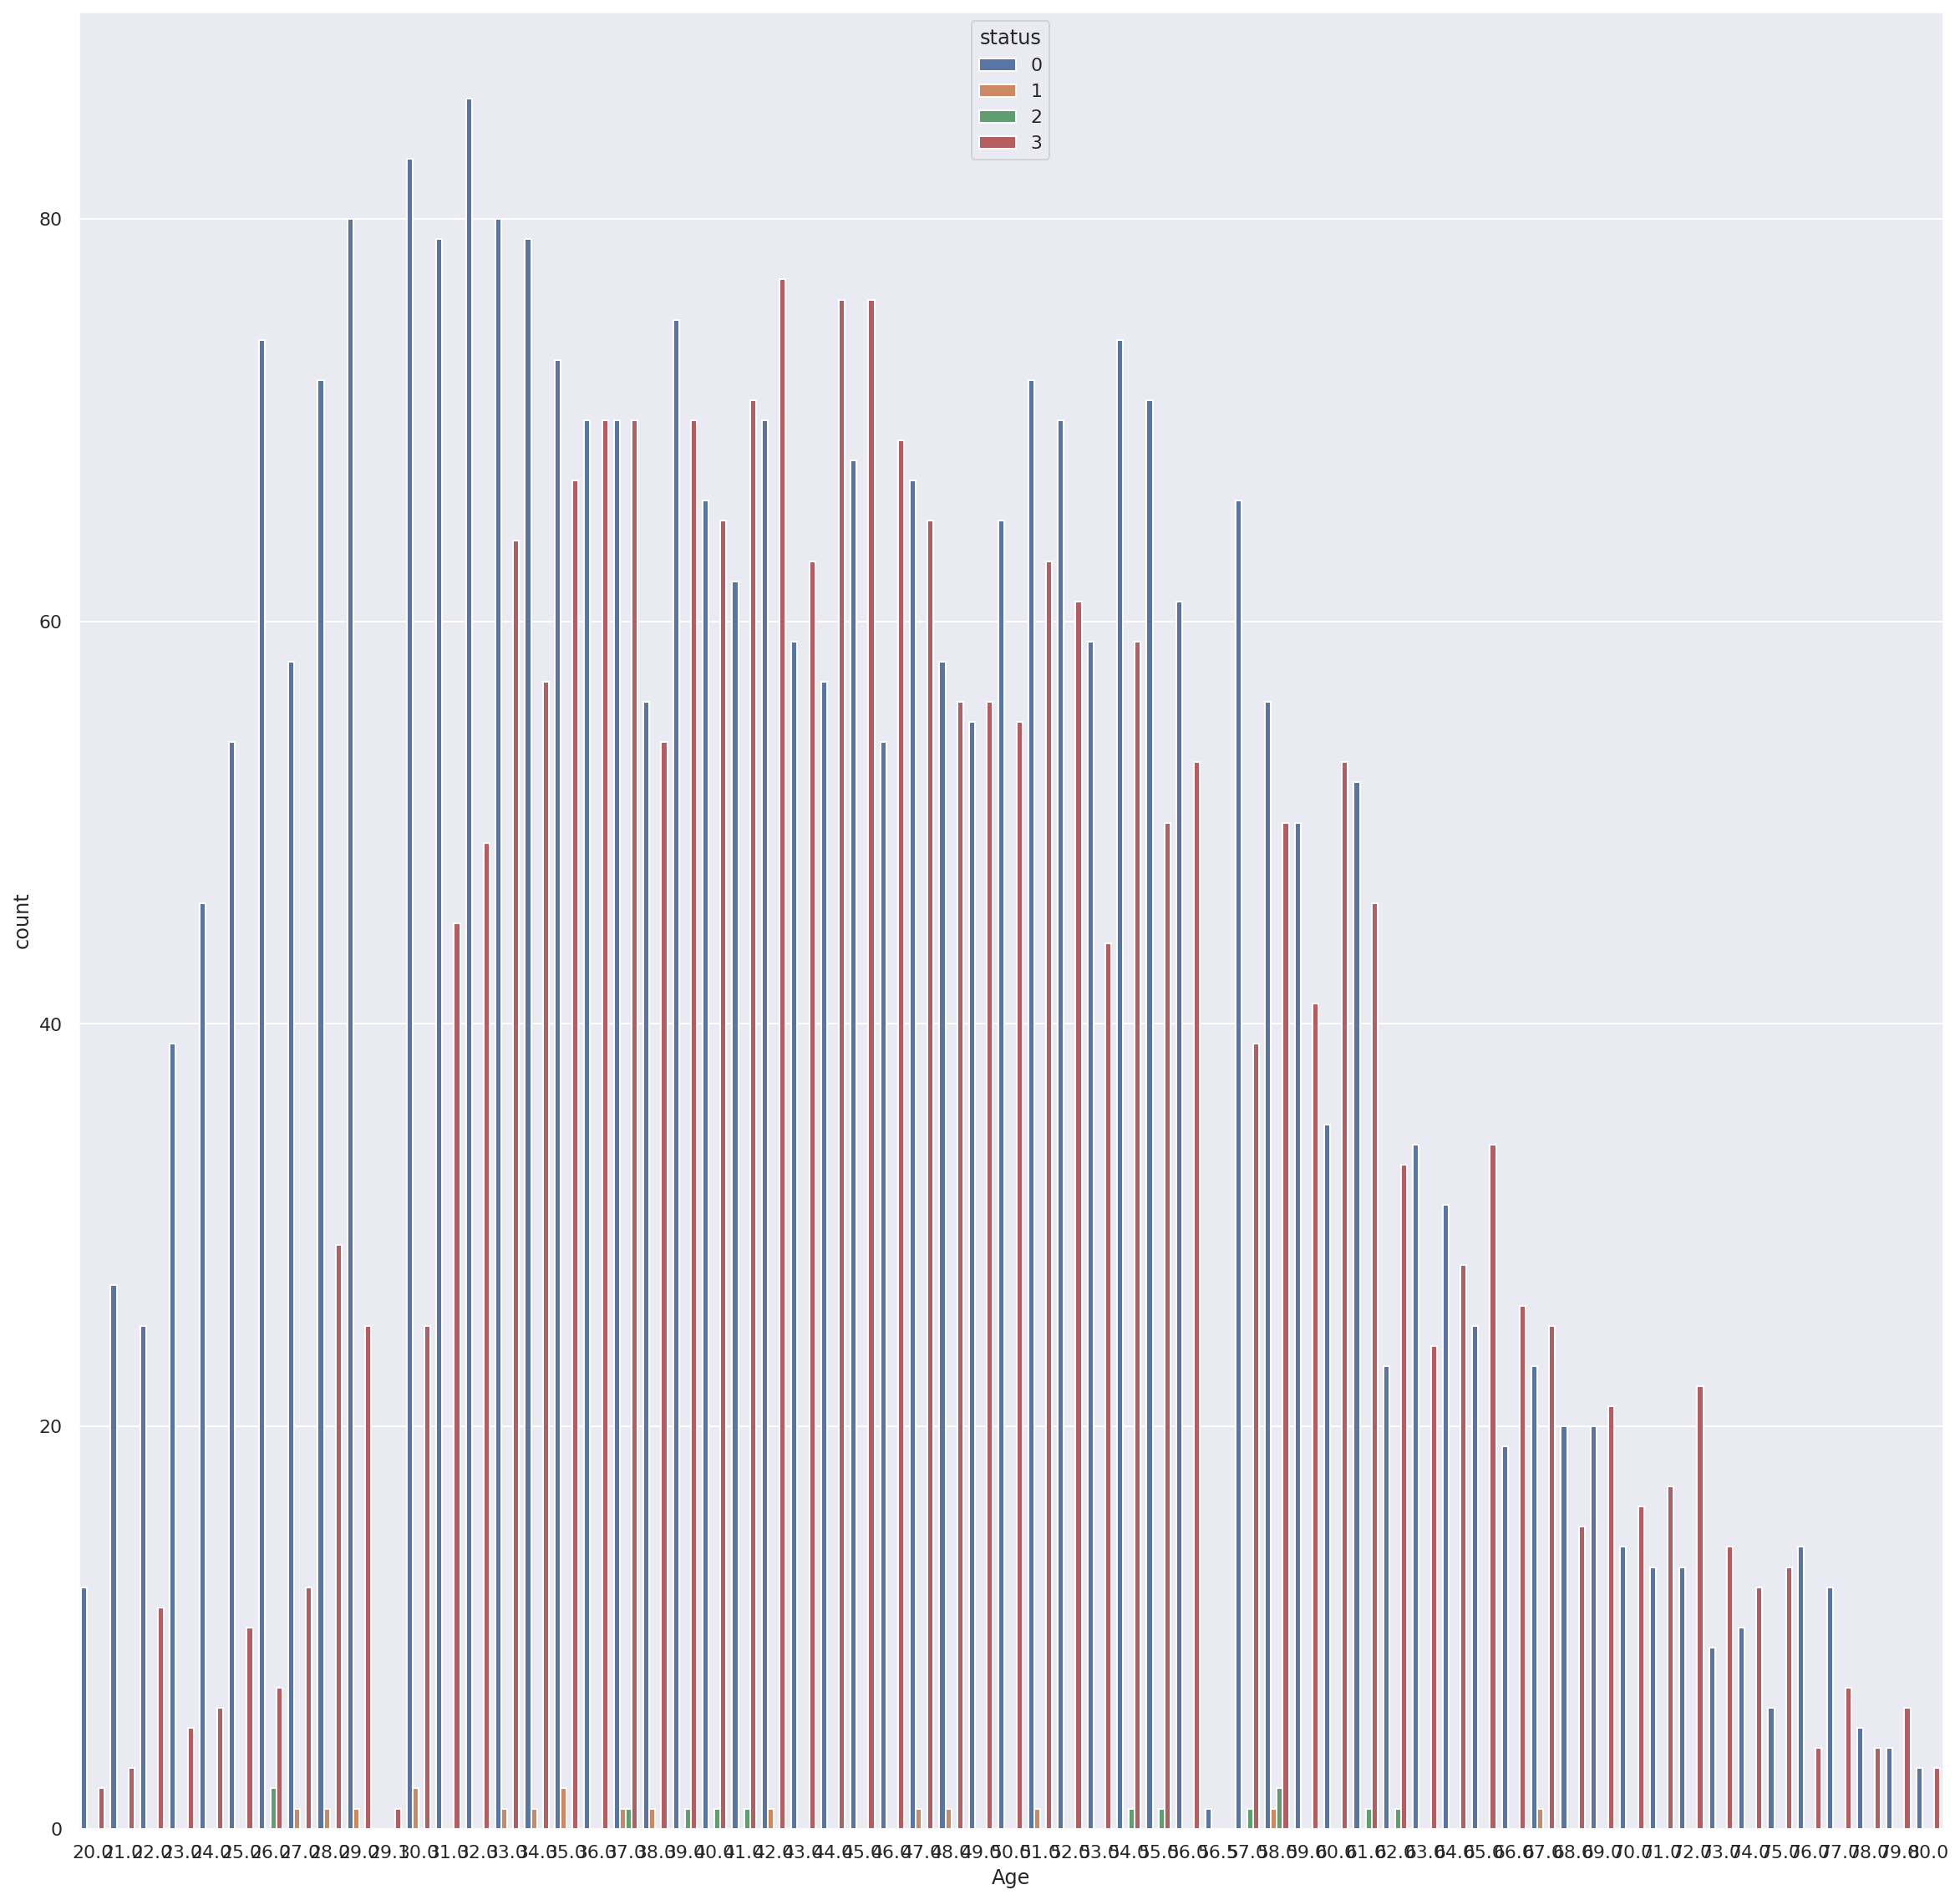

In [6]:
sns.countplot(x='Age', hue='status',data=df)
sns.set(rc={'figure.figsize':(40,40)})

In [7]:
df['status'].value_counts()

0    2884
3    2294
1      17
2      13
Name: status, dtype: int64

In [8]:
X=df.drop('status', axis=1) 
X

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M
0,0,14,29.065927,88.0,174.0,57.500000,39.0,95.5,106.5,20.0,1
1,0,8,26.989619,78.0,170.0,57.000000,36.5,90.0,100.0,20.0,1
2,0,16,23.939481,75.0,177.0,59.000000,39.0,88.0,104.0,20.0,1
3,0,15,22.129740,67.0,174.0,57.000000,35.0,74.0,94.0,20.0,1
4,0,15,22.129740,67.0,174.0,57.000000,35.0,74.0,94.0,20.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5203,1,6,24.005487,63.0,162.0,57.000000,33.0,99.0,101.5,77.0,0
5204,0,13,29.964328,63.0,145.0,53.000000,35.8,102.0,112.0,77.0,0
5205,0,13,29.964328,63.0,145.0,53.000000,35.8,102.0,112.0,77.0,0
5206,0,0,24.654832,60.0,156.0,54.500000,35.0,83.5,99.0,79.0,0


In [9]:
X = df.drop('status', axis=1)   # axis=0 for row, axis=1 for column
y = df['status']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [10]:
X_train.shape

(4166, 11)

In [11]:
from sklearn.cluster import KMeans

km=KMeans(n_clusters=len(df['status'].unique()), random_state=0)

In [12]:
y_pred =km.fit_predict(X_train)
y_pred=pd.Series(y_pred)

In [13]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances   
print('Adjusted Rand Score:',metrics.adjusted_rand_score(y_pred,y_train))
print('Homogenity Score:',metrics.homogeneity_score(y_pred,y_train))
print('Completeness Score:',metrics.completeness_score(y_pred,y_train))

Adjusted Rand Score: 0.08080158343360143
Homogenity Score: 0.09650103131379519
Completeness Score: 0.17594418220689564


In [14]:
kmean=pd.crosstab(y_pred,y_train,rownames=['Clusters'])
accuracy=(sum(np.diagonal(kmean))/(kmean.sum().sum()))*100
print('K-means Accuracy for status:',accuracy)
print('Comparing k-means clusters against the data:')
kmean

K-means Accuracy for status: 25.358851674641148
Comparing k-means clusters against the data:


status,0,1,2,3
Clusters,,,,
0,378,3,0,357
1,212,2,0,221
2,591,7,3,673
3,430,0,2,465


In [15]:
from sklearn.cluster import AgglomerativeClustering
ac=AgglomerativeClustering(n_clusters=len(df['status'].unique()))
y_pred =ac.fit_predict(X_test)
y_pred=pd.Series(y_pred)

In [16]:
from sklearn import metrics   
print('Adjusted Rand Score:',metrics.adjusted_rand_score(y_pred,y_test))
print('Homogenity Score:',metrics.homogeneity_score(y_pred,y_test))
print('Completeness Score:',metrics.completeness_score(y_pred,y_test))

Adjusted Rand Score: 0.17274034256211995
Homogenity Score: 0.10603696527881931
Completeness Score: 0.18265169249683788


In [17]:
acm=pd.crosstab(y_pred,y_test,rownames=['Clusters'])
accuracy=(sum(np.diagonal(acm))/(acm.sum().sum()))*100
print('Agglomerative Clustering Accuracy for Class Name:',accuracy)
print('Comparing Agglomerative clusters against the data:')
acm

Agglomerative Clustering Accuracy for Class Name: 31.98198198198198
Comparing Agglomerative clusters against the data:


status,0,2,3
Clusters,,,
0,62,0,33
1,30,1,23
2,7,0,8
3,31,0,27


In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

In [19]:

df=pd.read_csv('preprocessed_datset.csv')  
df.head()

,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,M,status
0,0,14,29.065927,88.0,174.0,57.5,39.0,95.5,106.5,20.0,1,0
1,0,8,26.989619,78.0,170.0,57.0,36.5,90.0,100.0,20.0,1,0
2,0,16,23.939481,75.0,177.0,59.0,39.0,88.0,104.0,20.0,1,0
3,0,15,22.129740,67.0,174.0,57.0,35.0,74.0,94.0,20.0,1,0
4,0,15,22.129740,67.0,174.0,57.0,35.0,74.0,94.0,20.0,1,0


In [20]:
X = df.drop('status', axis=1)
# axis=0 for row, axis=1 for column
X=df.drop('M',axis=1)
y = df.status
X


,BQ,ESS,BMI,Weight,Height,Head,Neck,Waist,Buttock,Age,status
0,0,14,29.065927,88.0,174.0,57.500000,39.0,95.5,106.5,20.0,0
1,0,8,26.989619,78.0,170.0,57.000000,36.5,90.0,100.0,20.0,0
2,0,16,23.939481,75.0,177.0,59.000000,39.0,88.0,104.0,20.0,0
3,0,15,22.129740,67.0,174.0,57.000000,35.0,74.0,94.0,20.0,0
4,0,15,22.129740,67.0,174.0,57.000000,35.0,74.0,94.0,20.0,0
...,...,...,...,...,...,...,...,...,...,...,...
5203,1,6,24.005487,63.0,162.0,57.000000,33.0,99.0,101.5,77.0,3
5204,0,13,29.964328,63.0,145.0,53.000000,35.8,102.0,112.0,77.0,3
5205,0,13,29.964328,63.0,145.0,53.000000,35.8,102.0,112.0,77.0,3
5206,0,0,24.654832,60.0,156.0,54.500000,35.0,83.5,99.0,79.0,3


In [21]:
import numpy as np
my_list = y
my_array = np.array(my_list)
# printing my_array
# printing the type of my_array

In [22]:
my_array 

array([0, 0, 0, ..., 3, 3, 0])

In [23]:
import numpy as np
my_list1 = X
my_array1 = np.array(my_list1)
# printing my_array
# printing the type of my_array

In [24]:
my_array1

array([[  0.        ,  14.        ,  29.06592681, ..., 106.5       ,
         20.        ,   0.        ],
       [  0.        ,   8.        ,  26.98961938, ..., 100.        ,
         20.        ,   0.        ],
       [  0.        ,  16.        ,  23.93948099, ..., 104.        ,
         20.        ,   0.        ],
       ...,
       [  0.        ,  13.        ,  29.96432818, ..., 112.        ,
         77.        ,   3.        ],
       [  0.        ,   0.        ,  24.65483235, ...,  99.        ,
         79.        ,   3.        ],
       [  1.        ,  17.        ,  20.07774787, ...,  88.        ,
         80.        ,   0.        ]])